<a href="https://colab.research.google.com/github/ClovisMonteiro/Redes_neurais/blob/master/Classifica%C3%A7%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Linear

In [0]:
import numpy as np
import matplotlib as plt

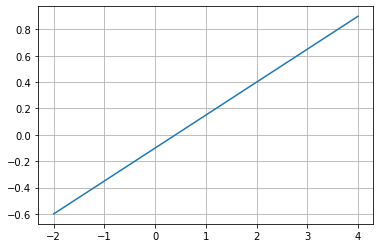

In [8]:
a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x - c ) / b

x = np.linspace(-2,4,50)
y = (-a*x - c ) / b

plt.pyplot.plot(x,y)
plt.pyplot.grid(True)

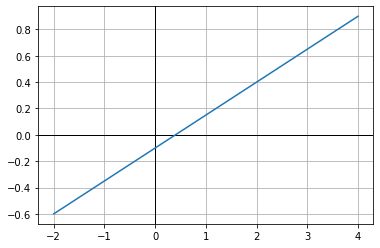

In [9]:
plt.pyplot.axvline(0, -1,1, color = "k", linewidth = 1)
plt.pyplot.axhline(0, -2,4, color = "k", linewidth = 1)
plt.pyplot.plot(x,y)
plt.pyplot.grid(True)

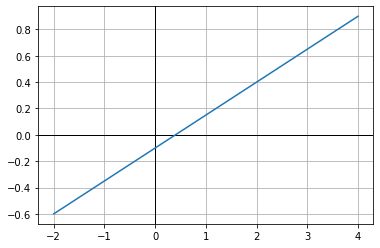

In [10]:
a = -1
b = 4
c = 0.4

def plotar_linha(a,b,c):
  x = np.linspace(-2,4,50)
  y = (-a*x - c ) / b

  plt.pyplot.axvline(0, -1,1, color = "k", linewidth = 1)
  plt.pyplot.axhline(0, -2,4, color = "k", linewidth = 1)
  plt.pyplot.plot(x,y)
  plt.pyplot.grid(True)

plotar_linha(a,b,c)

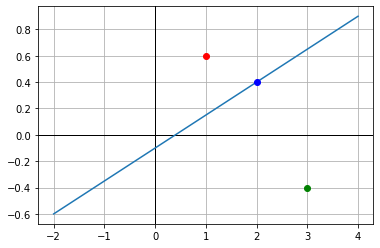

In [25]:
#Ao definir critérios para classificar qualquer tipo de dados, a equação da reta pode retornar informações valiosas

p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotar_linha(a,b,c)
plt.pyplot.plot(p1[0], p1[1], color ='b', marker = 'o')
plt.pyplot.plot(p2[0], p2[1], color ='r', marker = 'o')
plt.pyplot.plot(p3[0], p3[1], color ='g', marker = 'o')

In [24]:
#Qualquer ponto que escolher em cima da reta, o valor será 0
ret1 = a * p1[0] + b *p1[1] + c
ret2 = a * p2[0] + b *p2[1] + c
ret3 = a * p3[0] + b *p3[1] + c

print('%.2f' %ret1)
print('%.2f' %ret2)
print('%.2f' %ret3)

0.00
1.80
-4.20


In [0]:
# Explicação:

#f(x) = 0 - Define os pontos na reta
#f(x) > 0 - Define os pontos acima da reta
#f(x) < 0 - Define os pontos abaixo da reta

# Modo Linear

A reta pode ser interpretada como modelo linear, que nada mais é do que uma função de mapeamento X -> Y, que mapeia cada ponto em X para um ponto Y. Em outras palavras, dados os Parametros W = {w1, w2} e b de uma reta, é possivel mapear cada uma entrada X = {x1, x2} para uma saída f(x; W; b).

O perceptron é um tipo de modelo que utiliza a Claificação linear, a unica diferença é a troca do "X", para o "w".

Somatório de W em um X 

![Resumo do perceptron](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*umjlzp_KFd_peMOa2J4xlA.png&f=1&nofb=1)

À partir desse modelo, podemos definir uma entrada com D dimensões, e a função de mapeamento é o modelo linear de um somatório entre essas variavéis:

```
y = x1*w1 +  x2*w2 + b
```
```
y = x1*w1 +  x2*w2 + x3*w3 + b
```
```
y = x1*w1 +  x2*w2 + x3*w3 + x4*w4 + b
```
